In [55]:
import re
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import re
import tqdm

%matplotlib inline

In [ ]:
df = pd.read_json("neko_dic.json", "rt", encoding="utf-8")

In [3]:
df = df.T

In [4]:
df

,surface,base,pos,pos1
0 0,一,一,名詞-数詞,
2 0,吾輩,我が輩,代名詞,
2 1,は,は,助詞-係助詞,
2 2,猫,猫,名詞-普通名詞-一般,
2 3,で,だ,助動詞,助動詞-ダ 連用形-一般
...,...,...,...,...
9960 7,ぬ,ず,助動詞,助動詞-ヌ 終止形-一般
9961 0,南無阿弥陀仏,南無阿弥陀仏,名詞-普通名詞-一般,
9961 1,南無阿弥陀仏,南無阿弥陀仏,名詞-普通名詞-一般,
9962 0,ありがたい,有り難い,形容詞-一般,


In [5]:
df_neko = df[df["base"] == "猫"]

In [6]:
df_neko

,surface,base,pos,pos1
2 2,猫,猫,名詞-普通名詞-一般,
15 2,猫,猫,名詞-普通名詞-一般,
86 2,猫,猫,名詞-普通名詞-一般,
89 9,猫,猫,名詞-普通名詞-一般,
103 14,猫,猫,名詞-普通名詞-一般,
...,...,...,...,...
9878 18,猫,猫,名詞-普通名詞-一般,
9879 4,猫,猫,名詞-普通名詞-一般,
9884 35,猫,猫,名詞-普通名詞-一般,
9898 0,猫,猫,名詞-普通名詞-一般,


In [7]:
neko_sentence_list = []
for i, d in df_neko["base"].items():
    i_list = i.split()
    neko_sentence_list.append(i_list[0])

In [8]:
neko_sentence_list = list(set(neko_sentence_list))

In [9]:
words_list = []
for i, d in tqdm.tqdm(df["base"].items()):
    i_list = i.split()
    if i_list[0] in neko_sentence_list:
        words_list.append(d)

186664it [00:00, 221228.78it/s]


In [10]:
words_list

['我が輩',
 'は',
 '猫',
 'だ',
 '有る',
 '其の',
 '後',
 '猫',
 'に',
 'も',
 '大分',
 '会う',
 'た',
 'が',
 'こんな',
 '片端',
 'に',
 'は',
 '一',
 '度',
 'も',
 '出会わす',
 'た',
 '事',
 'が',
 '無い',
 '我が輩',
 'は',
 '猫',
 'ながら',
 '時々',
 '考える',
 '事',
 'が',
 '有る',
 'こんな',
 'だ',
 '寝る',
 'て',
 '居る',
 'て',
 '勤まる',
 '物',
 'だ',
 '猫',
 'に',
 'だ',
 'も',
 '出来る',
 'ず',
 '事',
 'は',
 '無い',
 'と',
 '子供',
 'は',
 '事',
 'に',
 '小さい',
 '方',
 'が',
 '質',
 'が',
 '悪い',
 '猫',
 'が',
 '来る',
 'た',
 '猫',
 'が',
 '来る',
 'た',
 'と',
 '言う',
 'て',
 '夜中',
 'で',
 'も',
 '何',
 'で',
 'も',
 '大きな',
 '声',
 'で',
 '泣く',
 '出す',
 'の',
 'だ',
 '有る',
 'まあ',
 '気',
 'を',
 '長い',
 '猫',
 'の',
 '時節',
 'を',
 '待つ',
 'が',
 '良い',
 '我が輩',
 'は',
 '猫',
 'と',
 '為る',
 'て',
 '決して',
 '上乗',
 'の',
 '出来',
 'で',
 'は',
 '無い',
 '背',
 'と',
 '良い',
 '毛並み',
 'と',
 '良い',
 '顔',
 'の',
 '造作',
 'と',
 '言い合う',
 'て',
 '他',
 'の',
 '猫',
 'に',
 '勝る',
 'と',
 'は',
 '決して',
 '思う',
 'て',
 '居る',
 'ず',
 '我が輩',
 'は',
 'ペルシャ-Persia',
 '産',
 'の',
 '猫',
 'の',
 'ごとし',
 '黄',
 'を',
 '含める',
 '淡い',
 '灰色',
 'に',
 '漆',
 

In [11]:
df_neko_sentence = pd.Series(words_list)

In [15]:
df_neko_sentence = df_neko_sentence[df_neko_sentence != "猫"]

In [45]:
a = df_neko_sentence.value_counts()[:10]
b=a.index.values
c = list(b)
type(c)
c = " ".join(c)
c

'の だ は て と を に が 為る た'

の だ は て と を に が 為る た


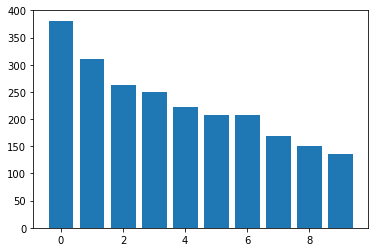

In [58]:
plt.bar(range(10), df_neko_sentence.value_counts()[:10])
print(c)